## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [23]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn import set_config
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [6]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [7]:
# word net installation:

# unmark if you want to use and need to install
# !pip install wn
# !python -m wn download omw-he:1.4

In [8]:
# word net import:

# unmark if you want to use:
# import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [9]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
# !pip install hebrew_tokenizer

In [10]:
# Hebrew tokenizer import:

# unmark if you want to use:
import hebrew_tokenizer as ht

C:\Users\roych\OneDrive\שולחן העבודה\Text Anylsis 2\assignment3-text_analysis


### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [11]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [12]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [13]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

<div style="background-color: black; padding: 10px; text-align: center;">
    <font face="Fugaz One" size=6 color='#999999'>Pre Processing.</font>    
</div>


<div style="background-color: lightblue; padding: 10px;">
<font face="Fugaz One" size=3 color='#00000'>This function takes Hebrew text as input, tokenizes it, <br/></font>    
<font face="Fugaz One" size=3 color='#00000'>and extracts Hebrew tokens, creating a list of those tokens for further use.<br/> </font>    
<font face="Fugaz One" size=3 color='#00000'>delete unnecessery numeric,punctioation and extra spaces tabs. </font>    <div/>

In [14]:
def tokenized(hebText):
    token = ht.tokenize(hebText)
    tok_list = list(filter(lambda x: (x[0] == 'HEBREW'),token))
    tok_list = [tuple[1] for tuple in tok_list]
    tok_list
    return tok_list



<div style="background-color: lightblue; padding: 10px;">
<font face="Fugaz One" size=3 color='#00000'>Divide the train seperate frames , 'story' and the 'gender' ( so it will be the target ) </font>    
<font face="Fugaz One" size=3 color='#00000'>The target feture 'gender' will change from categorial type to numeric.  </font>    
    <div/>


In [15]:
X_train = df_train["story"]
y_train = df_train["gender"].replace({'m': 1, 'f': 0})

In [16]:
print("First 5 rows from the feture 'story'")
X_train.head(5)
print()
print("First 5 rows from the feture 'gender' whice convert to numeric\n'1' for male, '0' for female")
y_train.head(5)

First 5 rows from the feture 'story'


0    כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...
1    לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...
2    מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...
3    כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...
4    ‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...
Name: story, dtype: object


First 5 rows from the feture 'gender' whice convert to numeric
'1' for male, '0' for female


0    1
1    1
2    0
3    1
4    0
Name: gender, dtype: int64

<div style="background-color: black; padding: 10px; text-align: center;">
    <font face="Fugaz One" size=6 color='#999999'>Cross Validation.</font>    
</div>


<div style="background-color: lightblue; padding: 10px;">
<font face="Fugaz One" size=3 color='#00000'>Sets the grid search parameters for each classifier based on its name.<br/> set defaults Hyperparameters and later i'll change them if it's necessary.</font>    
<div/>

In [15]:
models = [
    ('Perceptron', Perceptron()),
    ('LinearSVC', LinearSVC()),
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('MultinomialNB', MultinomialNB()),
    ('SGDClassifier', SGDClassifier()),
    ('KNeighborsClassifier', KNeighborsClassifier())
]



<div style="background-color: lightblue; padding: 10px;">
<font face="Fugaz One" size=3 color='#00000'>Initial hyperparameters are placed for each model,<br/></font>    
<font face="Fugaz One" size=3 color='#00000'>Some of them we chose randomly or by reading about them on the<br/> </font> <font face="Fugaz One" size=3 color='#00000'>Internet, some are default values that the system provides,<br/></font> 
<font face="Fugaz One" size=3 color='#00000'>And there are also those who express trial and error.</font>    
<div/>

In [16]:
def set_params():
    if name == 'LinearSVC':
        parameters = {'tfidf__ngram_range': [(1, 1), (1, 2)], 'tfidf__min_df' : [2, 4, 5],
                      'tfidf__max_df': [0.8, 0.9],'model__C': [0.1, 1, 10],
                      'model__penalty': ['l1', 'l2']}

    elif name == 'Perceptron':
        parameters = {'tfidf__ngram_range': [(1, 1), (1, 2)], 'tfidf__min_df' : [2, 4, 5],
                      'tfidf__max_df': [0.8, 0.9],'tfidf__sublinear_tf':[True, False],
                    'model__alpha': [0.000001, 0.00001, 0.0001], 'model__penalty': ['l2', 'l1']}

  
    elif name == 'DecisionTreeClassifier':
        parameters = {'tfidf__ngram_range': [(1, 1), (1, 2)], 'tfidf__min_df' : [2, 4, 5],
                      'tfidf__max_df': [0.8, 0.9], 'model__max_depth': [5, 10, 15],
                      'model__min_samples_leaf': [5, 10, 15]}

    
    elif name == 'MultinomialNB':
        parameters = {'tfidf__ngram_range': [(1, 1), (1, 2)], 'tfidf__min_df' : [2, 4, 5],
                      'tfidf__max_df': [0.8, 0.9], 'model__alpha': [0.01, 0.1, 1]}

   
    elif name == 'SGDClassifier':
        parameters = {'tfidf__ngram_range': [(1, 1), (1, 2)], 'tfidf__min_df' : [2, 4, 5],
                      'tfidf__max_df': [0.8, 0.9], 'model__alpha': [1e-3, 1e-4],
                      'model__penalty': ['l1', 'l2']}

    elif name == 'KNeighborsClassifier':
        parameters = {'tfidf__ngram_range': [(1, 1), (1, 2)], 'tfidf__min_df' : [2, 4, 5], 
                      'tfidf__max_df': [0.8, 0.9], 'model__n_neighbors': [3, 5, 7],
                      'model__metric': ['euclidean', 'manhattan', 'chebyshev'],
                      'model__leaf_size': [10, 20, 30]}
    return parameters

<div style="background-color: lightblue; padding: 10px;">
<font face="Fugaz One" size=3 color='#00000'>• Now I will intial the pipline for each model.<br/> </font>    
<font face="Fugaz One" size=3 color='#00000'>• GridSearch parameters setting ( using the set_parameters func ). <br/></font>    
<font face="Fugaz One" size=3 color='#00000'>• Print the best score and the estimator for each model.<br/> </font>    
<font face="Fugaz One" size=3 color='#00000'>• Than I will continue with the best model/s I will found. <br/></font>  

<font face="Fugaz One" size=3 color='#FF0000'> Notice : The GridSearch visualization displayed badly in GitHub <br/></font>  
<font face="Fugaz One" size=3 color='#00000'> If you want to look at them, I recomending to open it in Google Colab <br/></font>  
<div/>
                                 


In [17]:
for name, model in models:
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('norm', preprocessing.Normalizer()),
        ('model', model)
    ])

    params = set_params()
     
    set_config(display='diagram')      
                                         
                      
    grid = GridSearchCV(pipeline, params, scoring=make_scorer(f1_score, average='macro'), cv=10)
    grid.fit(X_train, y_train)

    print("The best score of the model is: ", round(grid.best_score_, 3))
    print("The best estimator of the model is: ", grid.best_estimator_)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('norm', Normalizer()),
                                       ('model', Perceptron())]),
             param_grid={'model__alpha': [1e-06, 1e-05, 0.0001],
                         'model__penalty': ['l2', 'l1'],
                         'tfidf__max_df': [0.8, 0.9],
                         'tfidf__min_df': [2, 4, 5],
                         'tfidf__ngram_range': [(1, 1), (1, 2)],
                         'tfidf__sublinear_tf': [True, False]},
             scoring=make_scorer(f1_score, average=macro))

The best score of the model is:  0.726
The best estimator of the model is:  Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.8, min_df=2, ngram_range=(1, 2),
                                 sublinear_tf=True)),
                ('norm', Normalizer()),
                ('model', Perceptron(alpha=1e-06, penalty='l1'))])


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('norm', Normalizer()),
                                       ('model', LinearSVC())]),
             param_grid={'model__C': [0.1, 1, 10],
                         'model__penalty': ['l1', 'l2'],
                         'tfidf__max_df': [0.8, 0.9],
                         'tfidf__min_df': [2, 4, 5],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring=make_scorer(f1_score, average=macro))

The best score of the model is:  0.687
The best estimator of the model is:  Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.9, min_df=5, ngram_range=(1, 2))),
                ('norm', Normalizer()), ('model', LinearSVC(C=10))])


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('norm', Normalizer()),
                                       ('model', DecisionTreeClassifier())]),
             param_grid={'model__max_depth': [5, 10, 15],
                         'model__min_samples_leaf': [5, 10, 15],
                         'tfidf__max_df': [0.8, 0.9],
                         'tfidf__min_df': [2, 4, 5],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring=make_scorer(f1_score, average=macro))

The best score of the model is:  0.648
The best estimator of the model is:  Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.9, min_df=4)),
                ('norm', Normalizer()),
                ('model',
                 DecisionTreeClassifier(max_depth=10, min_samples_leaf=15))])


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('norm', Normalizer()),
                                       ('model', MultinomialNB())]),
             param_grid={'model__alpha': [0.01, 0.1, 1],
                         'tfidf__max_df': [0.8, 0.9],
                         'tfidf__min_df': [2, 4, 5],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring=make_scorer(f1_score, average=macro))

The best score of the model is:  0.526
The best estimator of the model is:  Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.8, min_df=5, ngram_range=(1, 2))),
                ('norm', Normalizer()), ('model', MultinomialNB(alpha=0.01))])


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('norm', Normalizer()),
                                       ('model', SGDClassifier())]),
             param_grid={'model__alpha': [0.001, 0.0001],
                         'model__penalty': ['l1', 'l2'],
                         'tfidf__max_df': [0.8, 0.9],
                         'tfidf__min_df': [2, 4, 5],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring=make_scorer(f1_score, average=macro))

The best score of the model is:  0.713
The best estimator of the model is:  Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.8, min_df=5, ngram_range=(1, 2))),
                ('norm', Normalizer()),
                ('model', SGDClassifier(penalty='l1'))])


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('norm', Normalizer()),
                                       ('model', KNeighborsClassifier())]),
             param_grid={'model__leaf_size': [10, 20, 30],
                         'model__metric': ['euclidean', 'manhattan',
                                           'chebyshev'],
                         'model__n_neighbors': [3, 5, 7],
                         'tfidf__max_df': [0.8, 0.9],
                         'tfidf__min_df': [2, 4, 5],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring=make_scorer(f1_score, average=macro))

The best score of the model is:  0.613
The best estimator of the model is:  Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.9, min_df=2, ngram_range=(1, 2))),
                ('norm', Normalizer()),
                ('model',
                 KNeighborsClassifier(leaf_size=10, metric='euclidean'))])


<div style="background-color: lightblue; padding: 10px;">
<font face="Fugaz One" size=3 color='#FF0000'> GitHub does not support well in grid search <br/></font>  
<font face="Fugaz One" size=3 color='#00000'> Bellow there is some screen shoots from the jupyter nootbook of the GridSearch's results </font>  
    <div/>

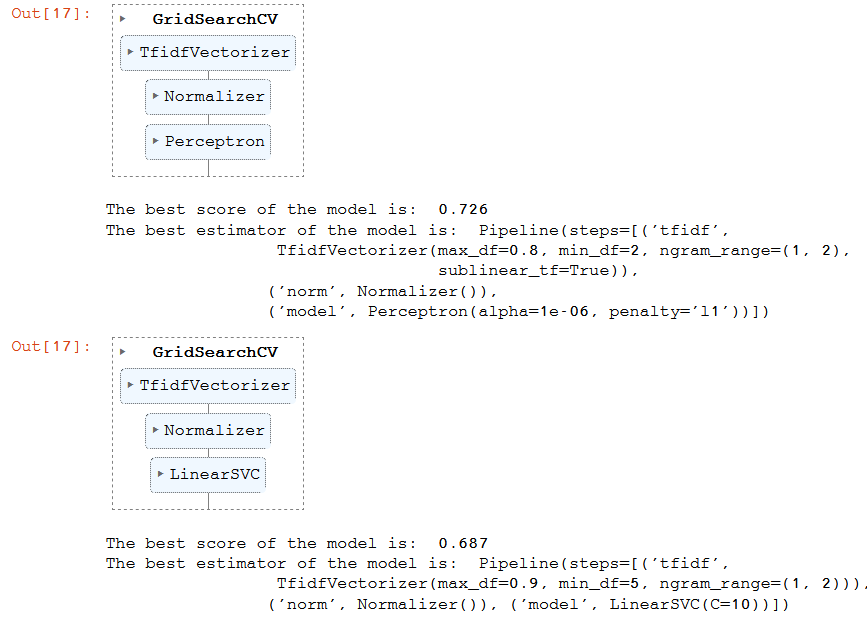


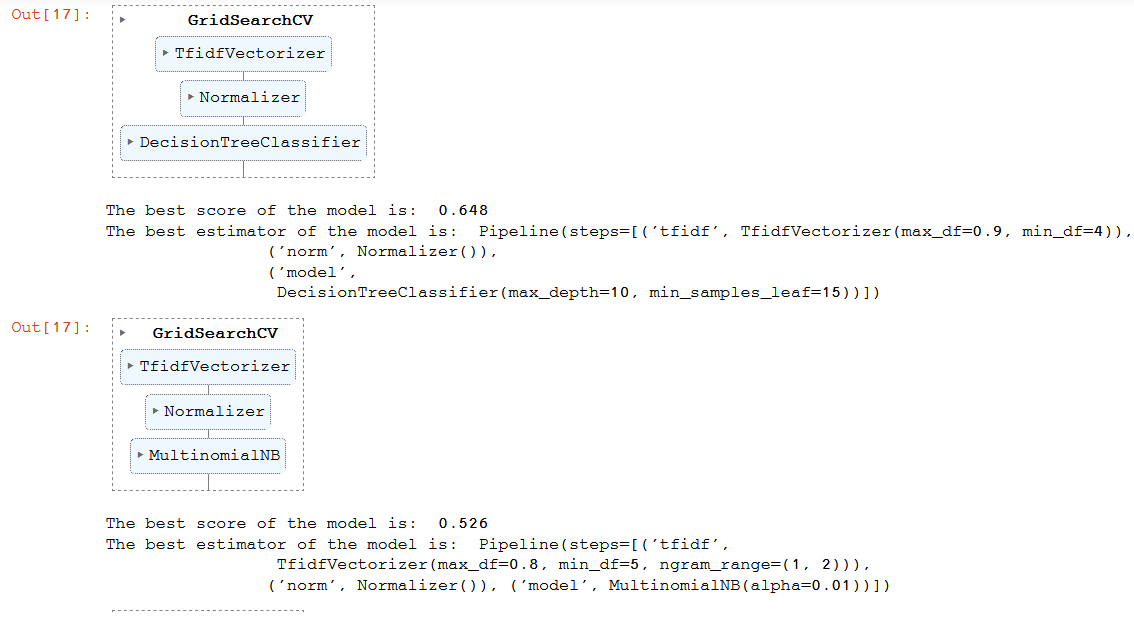

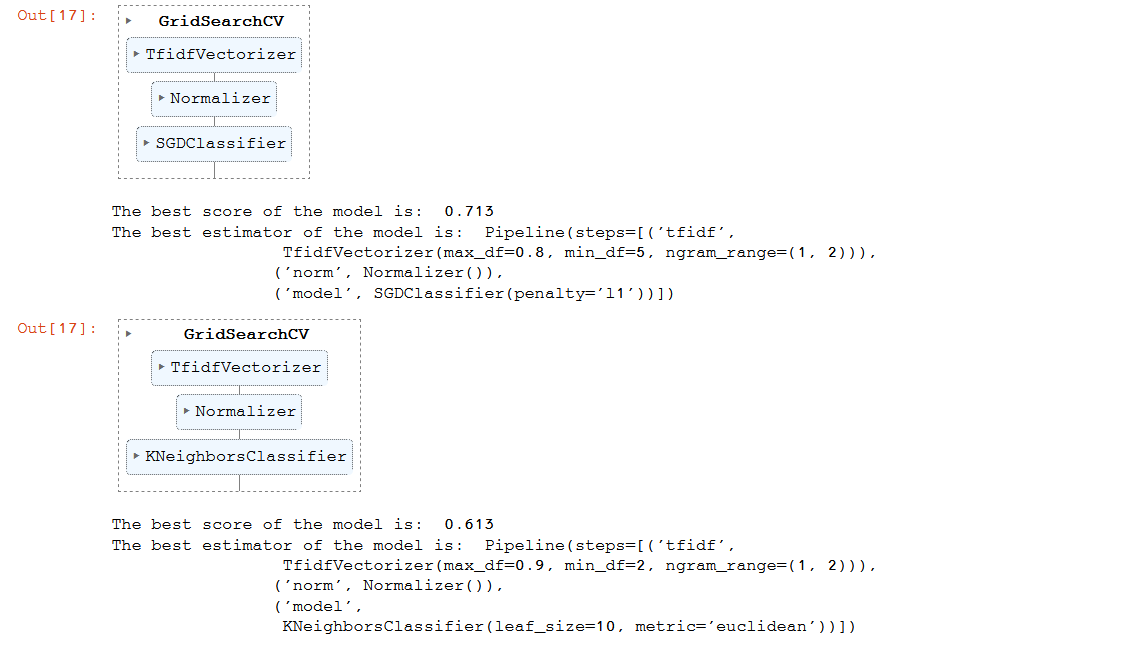

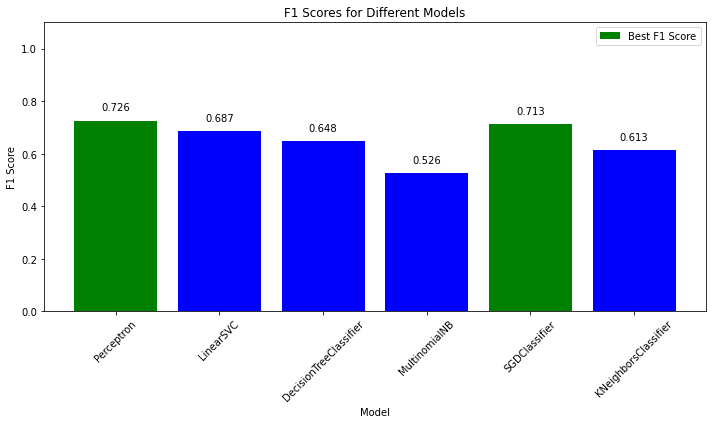

In [27]:
f1_scores = {
    'Perceptron': 0.726,
    'LinearSVC': 0.687,
    'DecisionTreeClassifier': 0.648,
    'MultinomialNB': 0.526,
    'SGDClassifier': 0.713,
    'KNeighborsClassifier': 0.613
}

# Sort models by F1 scores in descending order
sorted_models = sorted(f1_scores.items(), key=lambda x: x[1], reverse=True)

# Get names and scores of the two models with the highest scores
top_models = sorted_models[:2]
top_model_names = [model[0] for model in top_models]
top_model_scores = [model[1] for model in top_models]

model_names = list(f1_scores.keys())
f1_values = list(f1_scores.values())

plt.figure(figsize=(10, 6))

colors = ['green' if model in top_model_names else 'blue' for model in model_names]

plt.bar(model_names, f1_values, color=colors)
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Different Models')
plt.ylim(0, 1.1)
plt.xticks(rotation=45)

for i, (model, score) in enumerate(f1_scores.items()):
    plt.annotate(f'{score:.3f}', (i, score), textcoords="offset points", xytext=(0, 10), ha='center')

plt.tight_layout()


# Add legend in the right upper corner
# Will sign the color of the best model that you can notice whice one was great.
plt.legend(["Best F1 Score"], loc="upper right")

plt.show(); # Tip : if you want to getting rid of all the text before the plot print
            # add ';'  to the last line.


In [17]:
df_train.shape

(753, 2)

<div style="background-color: lightblue; padding: 10px;">
<font face="Fugaz One" size=3 color='#00000'>As we can see , I have two best models in my opinion<br/> </font>    
<font face="Fugaz One" size=3 color='#00000'>1️⃣ 'Perceptron'<br/>2️⃣ 'SGDClassifier' </font>    
<div/>


<div style="background-color: black; padding: 10px; text-align: center;">
        <font face="Fugaz One" size=6 color='#999999'>Assigns Improvements and Experiments.</font>    
</div>


<div style="background-color: lightblue; padding: 10px;">
<font face="Fugaz One" size=4 color='#00000'>Now I will try to run the bad models to improve our accuracy. </font>   
<div/>

In [18]:
bad_models = [
    ('LinearSVC', LinearSVC()),
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('MultinomialNB', MultinomialNB()),
    ('KNeighborsClassifier', KNeighborsClassifier())
]



In [19]:
def set_params_bad_models():
    if name == 'LinearSVC':
        parameters = {'tfidf__ngram_range': [(1, 1), (1, 2)], 'tfidf__min_df' : [1, 2, 3, 4],
                      'tfidf__max_df': [0.7, 0.8, 0.9],'model__C': [0.01, 0.1, 1],
                      'model__penalty': ['l2', 'l1']}
  
    elif name == 'DecisionTreeClassifier':
        parameters = {'tfidf__ngram_range': [(1, 1), (1, 2)], 'tfidf__min_df' : [1, 2, 3, 4],
                      'tfidf__max_df': [0.7, 0.8, 0.9], 'model__max_depth': [3, 5, 7, 10],
                      'model__min_samples_leaf': [3, 5, 7, 10]}

    
    elif name == 'MultinomialNB':
        parameters = {'tfidf__ngram_range': [(1, 1), (1, 2)], 'tfidf__min_df' : [1, 2, 3, 4],
                      'tfidf__max_df': [0.7, 0.8, 0.9], 'model__alpha': [0.001, 0.01, 0.1]}


    elif name == 'KNeighborsClassifier':
        parameters = {'tfidf__ngram_range': [(1, 1), (1, 2)], 'tfidf__min_df' : [1, 2, 3, 4], 
                      'tfidf__max_df': [0.7, 0.8, 0.9], 'model__n_neighbors': [5, 10, 15],
                      'model__metric': ['euclidean', 'manhattan', 'chebyshev'],
                      'model__leaf_size': [5, 10, 15]}
    return parameters


In [20]:
for name, model in bad_models:
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('norm', preprocessing.Normalizer()),
        ('model', model)
    ])

    params = set_params_bad_models()
     
    set_config(display='diagram')      
                                         
                      
    grid = GridSearchCV(pipeline, params, scoring=make_scorer(f1_score, average='macro'), cv=10)
    grid.fit(X_train, y_train)

    print("The best score of the model is: ", round(grid.best_score_, 3))
    print("The best estimator of the model is: ", grid.best_estimator_)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('norm', Normalizer()),
                                       ('model', LinearSVC())]),
             param_grid={'model__C': [0.01, 0.1, 1],
                         'model__penalty': ['l2', 'l1'],
                         'tfidf__max_df': [0.7, 0.8, 0.9],
                         'tfidf__min_df': [1, 2, 3, 4],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring=make_scorer(f1_score, average=macro))

The best score of the model is:  0.606
The best estimator of the model is:  Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.9, min_df=4)),
                ('norm', Normalizer()), ('model', LinearSVC(C=1))])


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('norm', Normalizer()),
                                       ('model', DecisionTreeClassifier())]),
             param_grid={'model__max_depth': [3, 5, 7, 10],
                         'model__min_samples_leaf': [3, 5, 7, 10],
                         'tfidf__max_df': [0.7, 0.8, 0.9],
                         'tfidf__min_df': [1, 2, 3, 4],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring=make_scorer(f1_score, average=macro))

The best score of the model is:  0.641
The best estimator of the model is:  Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.8, min_df=3, ngram_range=(1, 2))),
                ('norm', Normalizer()),
                ('model',
                 DecisionTreeClassifier(max_depth=10, min_samples_leaf=5))])


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('norm', Normalizer()),
                                       ('model', MultinomialNB())]),
             param_grid={'model__alpha': [0.001, 0.01, 0.1],
                         'tfidf__max_df': [0.7, 0.8, 0.9],
                         'tfidf__min_df': [1, 2, 3, 4],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring=make_scorer(f1_score, average=macro))

The best score of the model is:  0.523
The best estimator of the model is:  Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.7, min_df=3, ngram_range=(1, 2))),
                ('norm', Normalizer()), ('model', MultinomialNB(alpha=0.01))])


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('norm', Normalizer()),
                                       ('model', KNeighborsClassifier())]),
             param_grid={'model__leaf_size': [5, 10, 15],
                         'model__metric': ['euclidean', 'manhattan',
                                           'chebyshev'],
                         'model__n_neighbors': [5, 10, 15],
                         'tfidf__max_df': [0.7, 0.8, 0.9],
                         'tfidf__min_df': [1, 2, 3, 4],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring=make_scorer(f1_score, average=macro))

The best score of the model is:  0.637
The best estimator of the model is:  Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.9, ngram_range=(1, 2))),
                ('norm', Normalizer()),
                ('model',
                 KNeighborsClassifier(leaf_size=5, metric='euclidean'))])


<div style="background-color: lightblue; padding: 10px;">
<font face="Fugaz One" size=4 color='#00000'>As we can see, even we change a bit the Hyperparameters<br/> </font>   
<font face="Fugaz One" size=4 color='#FF0000'>the accuracy points to lower score than before <br/></font>   
<div/>

<div style="background-color: lightblue; padding: 10px;">
<font face="Fugaz One" size=4 color='#00000'>Now I will try to add a new model, and see if I can over the 0.7 accuracy </font>   <font face="Fugaz One" size=4 color='#00000'>score again  </font>   
<div/>

In [22]:
mlp_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('normalize', preprocessing.Normalizer()),
    ('clf', MLPClassifier(
                            solver='lbfgs',
                alpha=0.0001,
                hidden_layer_sizes=(50,),
                max_iter=200,
                batch_size=100,
                early_stopping=True,
                validation_fraction=0.1
            ))
])

param_grid = {
            'tfidf__ngram_range': [(1,1), (1,2)],
            'tfidf__min_df': [1,2],
            'clf__alpha': [0.0001, 0.001, 0.01],
            'clf__hidden_layer_sizes': [(50,), (100,)]
        }


set_config(display='diagram')

# Perform grid search
grid_search = GridSearchCV(mlp_pipeline,
                           param_grid, cv=10, scoring='f1_macro')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and cross-validation score
print("Best hyperparameters:", grid_search.best_params_)
print("Cross-validation F1 score:", grid_search.best_score_)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('normalize', Normalizer()),
                                       ('clf',
                                        MLPClassifier(batch_size=100,
                                                      early_stopping=True,
                                                      hidden_layer_sizes=(50,),
                                                      solver='lbfgs'))]),
             param_grid={'clf__alpha': [0.0001, 0.001, 0.01],
                         'clf__hidden_layer_sizes': [(50,), (100,)],
                         'tfidf__min_df': [1, 2],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring='f1_macro')

Best hyperparameters: {'clf__alpha': 0.0001, 'clf__hidden_layer_sizes': (100,), 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 1)}
Cross-validation F1 score: 0.6888706136473302


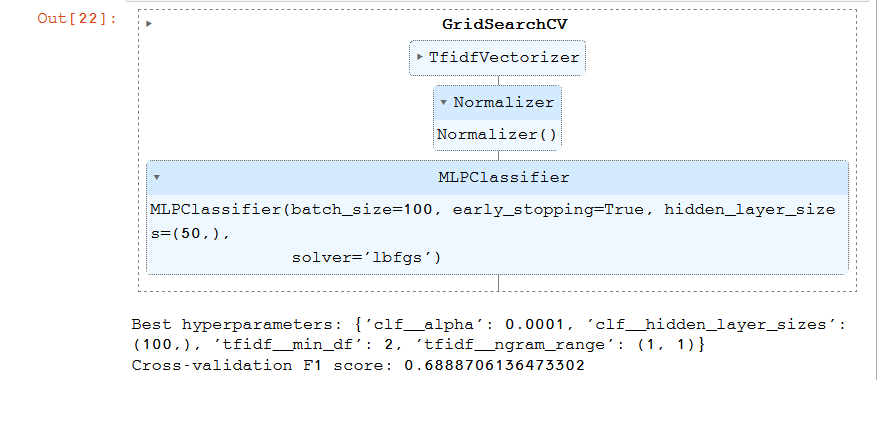

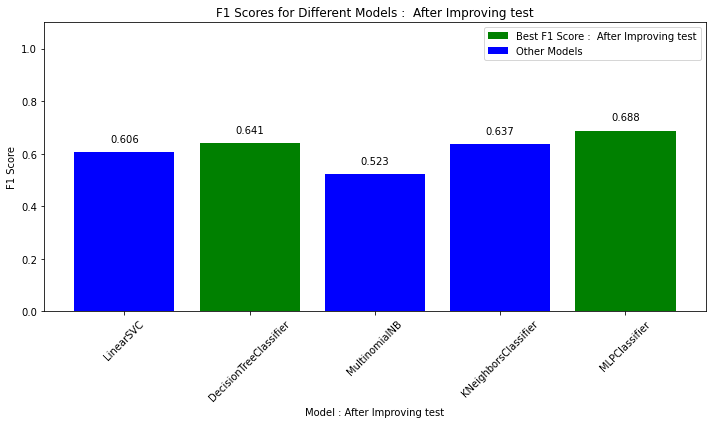

In [37]:
f1_scores = {
    'LinearSVC': 0.606,
    'DecisionTreeClassifier': 0.641,
    'MultinomialNB': 0.523,
    'KNeighborsClassifier': 0.637,
    'MLPClassifier': 0.688
}

sorted_models = sorted(f1_scores.items(), key=lambda x: x[1], reverse=True)

top_models = sorted_models[:2]
top_model_names = [model[0] for model in top_models]
top_model_scores = [model[1] for model in top_models]

model_names = list(f1_scores.keys())
f1_values = list(f1_scores.values())

plt.figure(figsize=(10, 6))

colors = ['green' if model in top_model_names else 'blue' for model in model_names]

bars = plt.bar(model_names, f1_values, color=colors)
plt.xlabel('Model : After Improving test')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Different Models :  After Improving test')
plt.ylim(0, 1.1)
plt.xticks(rotation=45)

for i, (model, score) in enumerate(f1_scores.items()):
    plt.annotate(f'{score:.3f}', (i, score), textcoords="offset points", xytext=(0, 10), ha='center')

plt.tight_layout()

legend_elements = [
    Patch(facecolor='green', label='Best F1 Score :  After Improving test'),
    Patch(facecolor='blue', label='Other Models')
]

plt.legend(handles=legend_elements, loc="upper right")

plt.show(); # Tip : if you want to getting rid of all the text before the plot print
            # add ';'  to the last line.


<div style="background-color: lightblue; padding: 10px;">
<font face="Fugaz One" size=4 color='#00000'>Let's take the NB model, thats present us the lower result.<br/></font>   
<font face="Fugaz One" size=4 color='#FF0000'>change a bit the Hyperparameters.<br/></font>   
<font face="Fugaz One" size=4 color='#FF0000'>Add our tokenized function into the Tf idf.</font>   
<div/>

In [52]:
NB_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(tokenizer=tokenized)),
    ('normalize', preprocessing.Normalizer(norm='l2')),
    ('clf', MultinomialNB())
])

param_grid = {
    'tfidf__max_df': [0.5, 0.75, 1.0],
    'clf__alpha': [0.0001, 0.001, 0.01, 0.1]
}

# Perform grid search
grid_search = GridSearchCV(NB_pipeline, param_grid, cv=10, scoring='f1_macro')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and cross-validation score
print("Best hyperparameters:", grid_search.best_params_)
print("Cross-validation F1 score:", grid_search.best_score_)


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(tokenizer=<function tokenized at 0x0000023A14E28B80>)),
                                       ('normalize', Normalizer()),
                                       ('clf', MultinomialNB())]),
             param_grid={'clf__alpha': [0.0001, 0.001, 0.01, 0.1],
                         'tfidf__max_df': [0.5, 0.75, 1.0]},
             scoring='f1_macro')

Best hyperparameters: {'clf__alpha': 0.01, 'tfidf__max_df': 0.5}
Cross-validation F1 score: 0.5075329955950617


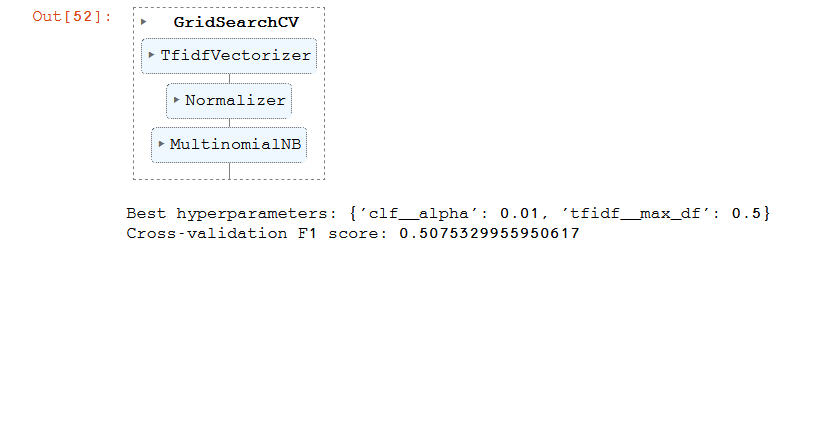

<div style="background-color: lightblue; padding: 10px;">
<font face="Fugaz One" size=4 color='#FF0000'>Even worse result </font> <div/>

<div style="background-color: lightblue; padding: 10px;">
    
<font face="Fugaz One" size=4 color='#FF0000'>As we can see, we were very close</font>      
<font face="Fugaz One" size=4 color='#FF0000'>but we could't succseed to reach 0.7 </font>       
<font face="Fugaz One" size=5 color='#00000'>so I'll stay with 'Perceptron' and 'SGD' results for the next step.
<div/>

<div style="background-color: black; padding: 10px; text-align: center;">
        <font face="Fugaz One" size=6 color='#999999'>Best Models</font>    
</div>



<div style="background-color: lightblue; padding: 10px;">
<font face="Fugaz One" size=3 color='#00000'>Now we will continue with the best models<br/></font>    
<font face="Fugaz One" size=3 color='#00000'>'Perceptron' and 'SGD' <br/></font>    
<font face="Fugaz One" size=3 color='#00000'>We're going to add some Hyperparameters to them.<br/> </font>    
<font face="Fugaz One" size=3 color='#00000'>We want to see some improving in the F1 score. </font>    
<div/>

<div style="background-color: lightblue; padding: 10px;">
<font face="Fugaz One" size=3 color='#00000'>⬇️ A reminder to our best models F1 scores ⬇️<br/></font>    

<div/>

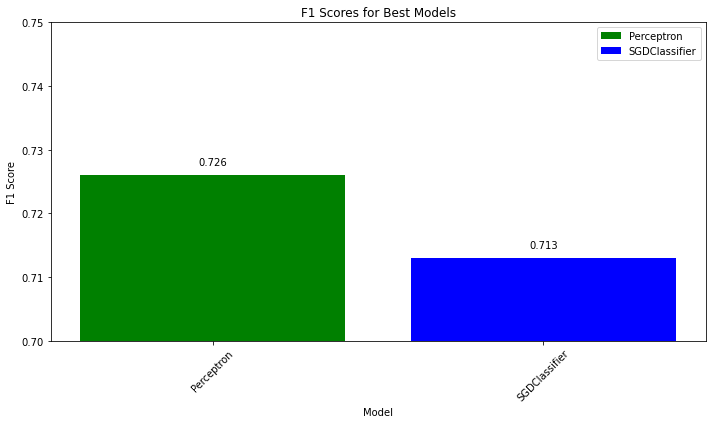

In [48]:
f1_scores = {
    'Perceptron': 0.726,
    'SGDClassifier': 0.713,
}

sorted_models = sorted(f1_scores.items(), key=lambda x: x[1], reverse=True)

top_models = sorted_models[:2]
top_model_names = [model[0] for model in top_models]
top_model_scores = [model[1] for model in top_models]

model_names = list(f1_scores.keys())
f1_values = list(f1_scores.values())

plt.figure(figsize=(10, 6))

bar_colors = ['green' if model == 'Perceptron' else 'blue' for model in model_names]

bars = plt.bar(model_names, f1_values, color=bar_colors)
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Best Models')
plt.ylim(0.7, 0.75)  # Adjust y limits
plt.xticks(rotation=45)

for i, (model, score) in enumerate(f1_scores.items()):
    plt.annotate(f'{score:.3f}', (i, score), textcoords="offset points", xytext=(0, 10), ha='center')

legend_elements = [
    Patch(facecolor='green', label='Perceptron'),
    Patch(facecolor='blue', label='SGDClassifier')
]

plt.legend(handles=legend_elements, loc="upper right")

plt.tight_layout()
plt.show();

<div style="background-color: lightblue; padding: 10px;"><font face="Fugaz One" size=3 color='#00000'>Create new list of the best models so far</font>    
</div>

In [53]:
best_models = [
    ('Perceptron', Perceptron()),
    ('SGDClassifier', SGDClassifier()),
]

<div style="background-color: lightblue; padding: 10px;">
    <font face="Fugaz One" size=3 color='#00000'>Initialize the best Hyperparameters, Also add some news.</font>
</div>


In [54]:
def best_models_params():
    if name == 'Perceptron':
         params = {'tfidf__ngram_range': [(1, 2), (2, 2)],'tfidf__min_df': [2, 3, 6],
                       'tfidf__max_df': [0.8, 0.6, 0.7],'tfidf__sublinear_tf': [True, False],
                       'model__alpha': [0.000001, 0.001, 0.01], 'model__penalty': ['l2', 'l1'],
                       'model__fit_intercept': [True, False], 'model__shuffle': [True, False]}
    
    elif name == 'SGDClassifier':
         params = {'tfidf__ngram_range': [(1, 2), (2, 2)], 'tfidf__min_df': [4, 3, 6],
                       'tfidf__max_df': [0.8, 0.6, 0.7], 'model__alpha': [1e-3, 1e-4],
                       'model__penalty': ['l1', 'l2'], 'model__fit_intercept': [True, False], 
                       'model__loss': ['hinge', 'log', 'modified_huber']}

    return params



<div style="background-color: lightblue; padding: 10px;">
    <font face="Fugaz One" size=3 color='#00000'>Initialize new pipeline for them, and hope for improving the F1 score</font>
</div>


In [55]:
highest_score = 0.0
best_model = None

for name, model in best_models:
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('norm', preprocessing.Normalizer(norm = 'l2')),
        ('model', model)
    ])

    params = best_models_params()
     
    set_config(display='diagram')      
                                         
                      
    grid = GridSearchCV(pipeline, params, scoring=make_scorer(f1_score, average='macro'), cv=10)
    grid.fit(X_train, y_train)

    if highest_score < grid.best_score_:
        highest_score = grid.best_score_
        best_model = grid.best_estimator_
    
    
    print("The best score of the model is: ", round(grid.best_score_, 3))
    print("The best estimator of the model is: ", grid.best_estimator_)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('norm', Normalizer()),
                                       ('model', Perceptron())]),
             param_grid={'model__alpha': [1e-06, 0.001, 0.01],
                         'model__fit_intercept': [True, False],
                         'model__penalty': ['l2', 'l1'],
                         'model__shuffle': [True, False],
                         'tfidf__max_df': [0.8, 0.6, 0.7],
                         'tfidf__min_df': [2, 3, 6],
                         'tfidf__ngram_range': [(1, 2), (2, 2)],
                         'tfidf__sublinear_tf': [True, False]},
             scoring=make_scorer(f1_score, average=macro))

The best score of the model is:  0.737
The best estimator of the model is:  Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.7, min_df=3, ngram_range=(1, 2),
                                 sublinear_tf=True)),
                ('norm', Normalizer()),
                ('model',
                 Perceptron(alpha=1e-06, fit_intercept=False, penalty='l2',
                            shuffle=False))])


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('norm', Normalizer()),
                                       ('model', SGDClassifier())]),
             param_grid={'model__alpha': [0.001, 0.0001],
                         'model__fit_intercept': [True, False],
                         'model__loss': ['hinge', 'log', 'modified_huber'],
                         'model__penalty': ['l1', 'l2'],
                         'tfidf__max_df': [0.8, 0.6, 0.7],
                         'tfidf__min_df': [4, 3, 6],
                         'tfidf__ngram_range': [(1, 2), (2, 2)]},
             scoring=make_scorer(f1_score, average=macro))

The best score of the model is:  0.721
The best estimator of the model is:  Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.7, min_df=3, ngram_range=(1, 2))),
                ('norm', Normalizer()),
                ('model',
                 SGDClassifier(fit_intercept=False, loss='modified_huber',
                               penalty='l1'))])


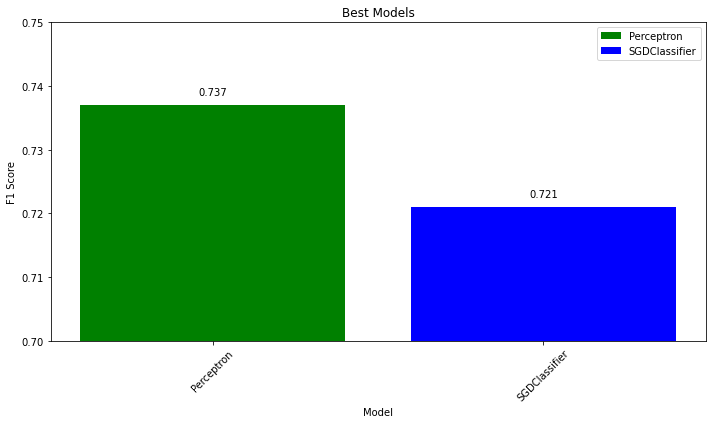

In [56]:
f1_scores = {
    'Perceptron': 0.737,
    'SGDClassifier': 0.721,
}

sorted_models = sorted(f1_scores.items(), key=lambda x: x[1], reverse=True)

top_models = sorted_models[:2]
top_model_names = [model[0] for model in top_models]
top_model_scores = [model[1] for model in top_models]

model_names = list(f1_scores.keys())
f1_values = list(f1_scores.values())

plt.figure(figsize=(10, 6))

bar_colors = ['green' if model == 'Perceptron' else 'blue' for model in model_names]

bars = plt.bar(model_names, f1_values, color=bar_colors)
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('Best Models')
plt.ylim(0.7, 0.75)  # Adjust y limits
plt.xticks(rotation=45)

for i, (model, score) in enumerate(f1_scores.items()):
    plt.annotate(f'{score:.3f}', (i, score), textcoords="offset points", xytext=(0, 10), ha='center')

legend_elements = [
    Patch(facecolor='green', label='Perceptron'),
    Patch(facecolor='blue', label='SGDClassifier')
]

plt.legend(handles=legend_elements, loc="upper right")

plt.tight_layout()
plt.show();

<div style="background-color: lightblue; padding: 10px;">

<font face="Fugaz One" size=5 color='#00000' style="background-color: lightblue">As we can see </font>    
<font face="Fugaz One" size=3 color='#00000' style="background-color: lightblue">'Perceptron' is still the best model from all the models we checked<br/>But there is a bit improve with those Hyperparameters </font>    
<font face="Fugaz One" size=3 color='#FF0000' style="background-color: lightblue">I want to give 'SGD' last chance to overcome the 'Perceptron' result</font>    
<font face="Fugaz One" size=3 color='#AA0000' style="background-color: lightblue">I will change a bit the Hyperparameters</font>
<div/>

In [58]:
SGDClassifier_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(tokenizer=tokenized)),
    ('normalize', preprocessing.Normalizer(norm='l2')),
    ('clf', SGDClassifier(random_state=42))
])

param_grid = {
    'clf__alpha': [0.0001, 0.001, 0.01],
    'clf__penalty': ['elasticnet'],
    'clf__loss': ['hinge', 'log', 'modified_huber'],
    'clf__max_iter': [100, 200, 300],
    'clf__learning_rate': ['optimal', 'adaptive'],
    'clf__eta0': [0.01, 0.1, 1],
    'clf__validation_fraction': [0.1, 0.2],
    'clf__n_iter_no_change': [5, 10]
}

# Perform grid search
grid_search = GridSearchCV(SGDClassifier_pipeline, param_grid, cv=10, scoring='f1_macro')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and cross-validation score
print("Best hyperparameters for SGDClassifier:", grid_search.best_params_)
print("Cross-validation F1 score for SGDClassifier:", grid_search.best_score_)


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(tokenizer=<function tokenized at 0x0000023A14E28B80>)),
                                       ('normalize', Normalizer()),
                                       ('clf',
                                        SGDClassifier(random_state=42))]),
             param_grid={'clf__alpha': [0.0001, 0.001, 0.01],
                         'clf__eta0': [0.01, 0.1, 1],
                         'clf__learning_rate': ['optimal', 'adaptive'],
                         'clf__loss': ['hinge', 'log', 'modified_huber'],
                         'clf__max_iter': [100, 200, 300],
                         'clf__n_iter_no_change': [5, 10],
                         'clf__penalty': ['elasticnet'],
                         'clf__validation_fraction': [0.1, 0.2]},
             scoring='f1_macro')

Best hyperparameters for SGDClassifier: {'clf__alpha': 0.0001, 'clf__eta0': 0.01, 'clf__learning_rate': 'optimal', 'clf__loss': 'hinge', 'clf__max_iter': 100, 'clf__n_iter_no_change': 5, 'clf__penalty': 'elasticnet', 'clf__validation_fraction': 0.1}
Cross-validation F1 score for SGDClassifier: 0.6639265100609184


<div style="background-color: lightblue; padding: 10px;">

<font face="Fugaz One" size=5 color='#00000' style="background-color: lightblue">As we can see </font>    
<font face="Fugaz One" size=3 color='#00000' style="background-color: lightblue">'Perceptron' is still the best model from all the models we checked<br/>And the improvment test we did on the SGD has failed. </font>    
<font face="Fugaz One" size=3 color='#FF0000'>I think there is a possible way to make SGD overcome the Perceptron's result but<br/>I am really satisfied from all we've gained so far</font>  
<div/>

In [59]:
print(f"The highest score of the model is: {highest_score}\n")
print(f"The best model is :", best_model)

The highest score of the model is: 0.7368324272547824

The best model is : Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.7, min_df=3, ngram_range=(1, 2),
                                 sublinear_tf=True)),
                ('norm', Normalizer()),
                ('model',
                 Perceptron(alpha=1e-06, fit_intercept=False, penalty='l2',
                            shuffle=False))])


<div style="background-color: black; padding: 10px; text-align: center;">
        <font face="Fugaz One" size=6 color='#999999'>The Best Model</font>    
</div>


<div style="background-color: lightblue; padding: 10px;"><font face="Fugaz One" size=5 color='#00000'>Average F1 score : Best Model with Tf idf</font>    
</div>

In [61]:
tfidf_for_perceptron = Pipeline(
    [
        ('tfidf',TfidfVectorizer(max_df=0.7, min_df=3, ngram_range=(1, 2),
                                 sublinear_tf=True)),
                ('norm', preprocessing.Normalizer()),
                ('model',
                 Perceptron(alpha=1e-06, fit_intercept=False, penalty='l2',
                            shuffle=False))])


tfidf_for_perceptron.fit(X_train, y_train)
f1_scores = cross_val_score(
    tfidf_for_perceptron, X_train, y_train, cv=10, scoring='f1_macro')
avg_f1_score = np.mean(f1_scores)
print("Average F1 score:", avg_f1_score)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.7, min_df=3, ngram_range=(1, 2),
                                 sublinear_tf=True)),
                ('norm', Normalizer()),
                ('model',
                 Perceptron(alpha=1e-06, fit_intercept=False, penalty='l2',
                            shuffle=False))])

Average F1 score: 0.7368324272547824


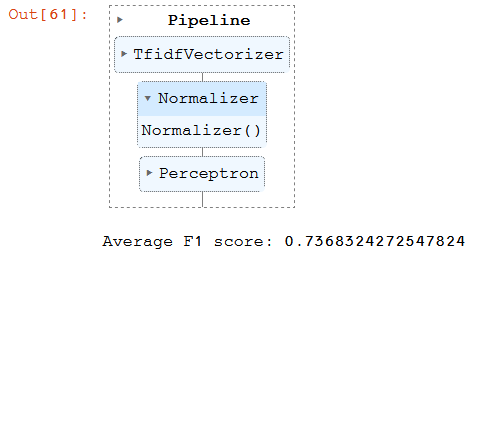

<div style="background-color: lightblue; padding: 10px;"><font face="Fugaz One" size=5 color='#00000'>Average F1 score : Best Model with CountVectorizer</font>    
</div>

In [63]:
CountVectorizer_for_perceptron = Pipeline(
    [
        ('tfidf', TfidfVectorizer(tokenizer=tokenized, max_df=0.7, min_df=3, ngram_range=(1, 2), sublinear_tf=True)),
        ('norm', preprocessing.Normalizer()),
        ('model', Perceptron(alpha=1e-06, fit_intercept=False, penalty='l2', shuffle=False))
    ]
)

CountVectorizer_for_perceptron.fit(X_train, y_train)
f1_scores = cross_val_score(
    CountVectorizer_for_perceptron, X_train, y_train, cv=10, scoring='f1_macro'
)
avg_f1_score = np.mean(f1_scores)
print("Average F1 score:", avg_f1_score)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.7, min_df=3, ngram_range=(1, 2),
                                 sublinear_tf=True,
                                 tokenizer=<function tokenized at 0x0000023A14E28B80>)),
                ('norm', Normalizer()),
                ('model',
                 Perceptron(alpha=1e-06, fit_intercept=False, penalty='l2',
                            shuffle=False))])

Average F1 score: 0.7061831601923216


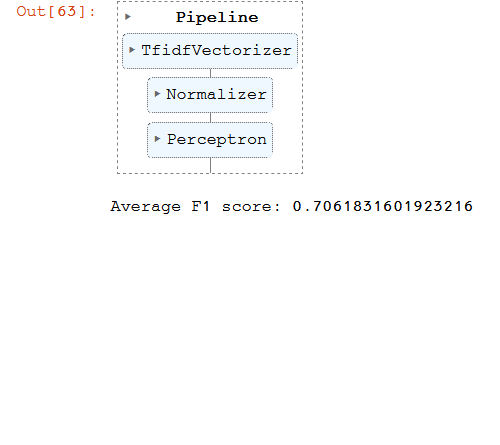

<div style="background-color: lightblue; padding: 10px;"><font face="Fugaz One" size=5 color='#FF0000'>As we can see<br/></font>   
    <font face="Fugaz One" size=3 color='#00000'>The Perceptron shows very consistent F1 scores all over the tests<br/></font>   
    <font face="Fugaz One" size=5 color='#00000'>Now we are going to implement it on the test data<br/></font>   
</div>

<div style="background-color: lightblue; padding: 10px;"><font face="Fugaz One" size=6 color='#00000'>Perceptron <br/></font>   
    <font face="Fugaz One" size=5 color='#00000'>Highest F1 score : 0.7368324272547824 😀💥🔥
</div>

In [65]:
y_pred = tfidf_for_perceptron.predict(df_test["story"])
y_pred = np.where(y_pred == 1, 'm', 'f')
pd.DataFrame({'id_test': df_test["test_example_id"], 'y_pred': y_pred}).head(5)
pd.DataFrame({'id_test': df_test["test_example_id"], 'y_pred': y_pred}).tail(5)

,id_test,y_pred
0,0,m
1,1,m
2,2,m
3,3,m
4,4,m


,id_test,y_pred
318,318,m
319,319,m
320,320,m
321,321,m
322,322,m


<div style="background-color: lightblue; padding: 10px;"><font face="Fugaz One" size=5 color='#FF0000'>Saving to Data Frame<br/></font>    
</div>

In [74]:
df_predicted = pd.DataFrame(
    {'test_example_id': df_test['test_example_id'], 'predicted_category': y_pred})
df_predicted

,test_example_id,predicted_category
0,0,m
1,1,m
2,2,m
3,3,m
4,4,m
...,...,...
318,318,m
319,319,m
320,320,m
321,321,m


In [75]:
df_predicted.to_csv('classification_results.csv',index=False)